### 1.0 Import libraries

In [4]:
#import main libraries
import pandas as pd
import numpy as np

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


#data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#patch sklearnex into this notebook to speed up ML processes
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### 1.1 Import dataset

#read for cleaning dataset once you come back to this

https://www.kaggle.com/andrewhou/data-cleaning-and-visualization-for-beginners

In [3]:
url="https://github.com/adireksa/iod/raw/main/Projects/Mini%20Project%203/investments_VC.csv"
df=pd.read_csv(url, encoding = "ISO-8859-1")

In [4]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [5]:
df[' market ']

0                News 
1               Games 
2          Publishing 
3         Electronics 
4             Tourism 
             ...      
54289              NaN
54290              NaN
54291              NaN
54292              NaN
54293              NaN
Name:  market , Length: 54294, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [7]:
df['name'].nunique()

49350

In [8]:
df['last_funding_at'].value_counts()

2013-01-01    387
2014-01-01    364
2012-01-01    348
2008-01-01    302
2011-01-01    272
             ... 
2005-09-03      1
2009-05-24      1
2010-10-02      1
1998-06-30      1
2008-07-13      1
Name: last_funding_at, Length: 3657, dtype: int64

In [9]:
df['name'].value_counts()

Roost                  4
Spire                  4
Cue                    3
Compass                3
Hubbub                 3
                      ..
Game Trust             1
Game Ventures          1
Game9z                 1
GameAccount Network    1
[x+1]                  1
Name: name, Length: 49350, dtype: int64

#### Dataset

***Abstract: Contains investment data on 49,350 unique companies over 54,294 investment events. Assumption that this is 1y data collected in 2014. There is investment information from 2010-2014. Collected Data was sourced from kaggle***

#### Data Set Information:

38 feature columns with numerous missing values on each column

#### Attribute Information:

feature columns are pretty self explanatory. But let me know if you have any questions

### 1.2 Data cleaning 

In [10]:
#drop permalink and homepage_url col as they will not help analysis. there is already 1 identifier which is #name
del df['permalink']
del df['homepage_url']

In [11]:
df.head(1)

name                               category_list  market   \
0  #waywire  |Entertainment|Politics|Social Media|News|    News    

   funding_total_usd     status country_code state_code         region  \
0          17,50,000   acquired          USA         NY  New York City   

       city  funding_rounds  ... secondary_market product_crowdfunding  \
0  New York             1.0  ...              0.0                  0.0   

  round_A  round_B round_C round_D  round_E  round_F  round_G  round_H  
0     0.0      0.0     0.0     0.0      0.0      0.0      0.0      0.0  

[1 rows x 37 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   category_list         45477 non-null  object 
 2    market               45470 non-null  object 
 3    funding_total_usd    49438 non-null  object 
 4   status                48124 non-null  object 
 5   country_code          44165 non-null  object 
 6   state_code            30161 non-null  object 
 7   region                44165 non-null  object 
 8   city                  43322 non-null  object 
 9   funding_rounds        49438 non-null  float64
 10  founded_at            38554 non-null  object 
 11  founded_month         38482 non-null  object 
 12  founded_quarter       38482 non-null  object 
 13  founded_year          38482 non-null  float64
 14  first_funding_at      49438 non-null  object 
 15  last_funding_at    

In [13]:
df.columns

Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [14]:
# some of the columns have space in front. removing spaces from them
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

In [15]:
df['funding_total_usd'].nunique()

14617

In [16]:
#funding total amount is an obj column and there are ',' that need to be removed in order to turn it to numeric
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','') 
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0')
#turn fundingtotalusd to numeric
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])

In [17]:
#change all date columns to datetime format
#df founded at format is in Y-m-d. so we use %Y-%m-%d. all errors set to NaN values
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce') 

In [18]:
#df foundedmonth at format is in Y-m. so we use %Y-%m. all errors set to NaN values
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce')

In [19]:
#drop founded quarter as the information is redundant
del df['founded_quarter']

In [20]:
#df foundedmonth at format is in Y. so we use %Y. all errors set to NaN values
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce')

In [21]:
#df first_funding_at at format is in Y-m. so we use %Y-%m-%d. all errors set to NaN values
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')

In [22]:
#df first_funding_at at format is in Y-m. so we use %Y-%m-%d. all errors set to NaN values
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')

In [23]:
#check values in market col. found spaces
for col in df:
    print(df['market'].unique())

[' News ' ' Games ' ' Publishing ' ' Electronics ' ' Tourism '
 ' Software ' ' Advertising ' ' Curated Web ' ' E-Commerce '
 ' Health and Wellness ' ' Real Estate ' ' Education ' ' Search '
 ' Marketplaces ' ' Restaurants ' ' Media ' ' Hospitality '
 ' Health Care Information Technology ' ' Analytics ' ' Fashion '
 ' Mobile Commerce ' ' Mobility ' ' Biotechnology ' ' Social Travel '
 ' Enterprise Software ' ' Personal Health ' ' Sports ' ' Mobile '
 ' Pharmaceuticals ' ' SaaS ' nan ' Manufacturing ' ' Entertainment '
 ' Travel ' ' Designers ' ' Finance ' ' Lifestyle ' ' Chat '
 ' File Sharing ' ' Video Chat ' ' Mobile Health ' ' Mobile Security '
 ' Social Media ' ' Photography ' ' Fitness ' ' Sales and Marketing '
 ' Predictive Analytics ' ' Financial Services ' ' Art ' ' Big Data '
 ' Blogging Platforms ' ' Hardware + Software ' ' Social Fundraising '
 ' Clean Technology ' ' Services ' ' Outsourcing ' ' Corporate IT '
 ' Mobile Social ' ' Messaging ' ' Navigation ' ' Transportation '

In [24]:
#removing space from beginnning and end of market column
df['market'] = df['market'].str.strip() 

In [25]:
#check values in market col. found spaces
for col in df:
    print(df['category_list'].unique())

['|Entertainment|Politics|Social Media|News|' '|Games|'
 '|Publishing|Education|' ...
 '|Technology|Facebook Applications|Networking|Games|'
 '|Analytics|Gamification|Developer APIs|iOS|Android|Education|'
 '|Web Development|Advertising|Wireless|Mobile|']
['|Entertainment|Politics|Social Media|News|' '|Games|'
 '|Publishing|Education|' ...
 '|Technology|Facebook Applications|Networking|Games|'
 '|Analytics|Gamification|Developer APIs|iOS|Android|Education|'
 '|Web Development|Advertising|Wireless|Mobile|']
['|Entertainment|Politics|Social Media|News|' '|Games|'
 '|Publishing|Education|' ...
 '|Technology|Facebook Applications|Networking|Games|'
 '|Analytics|Gamification|Developer APIs|iOS|Android|Education|'
 '|Web Development|Advertising|Wireless|Mobile|']
['|Entertainment|Politics|Social Media|News|' '|Games|'
 '|Publishing|Education|' ...
 '|Technology|Facebook Applications|Networking|Games|'
 '|Analytics|Gamification|Developer APIs|iOS|Android|Education|'
 '|Web Development|Adverti

In [26]:
df['category_list'].nunique()

16675

In [27]:
#del df['category_list']

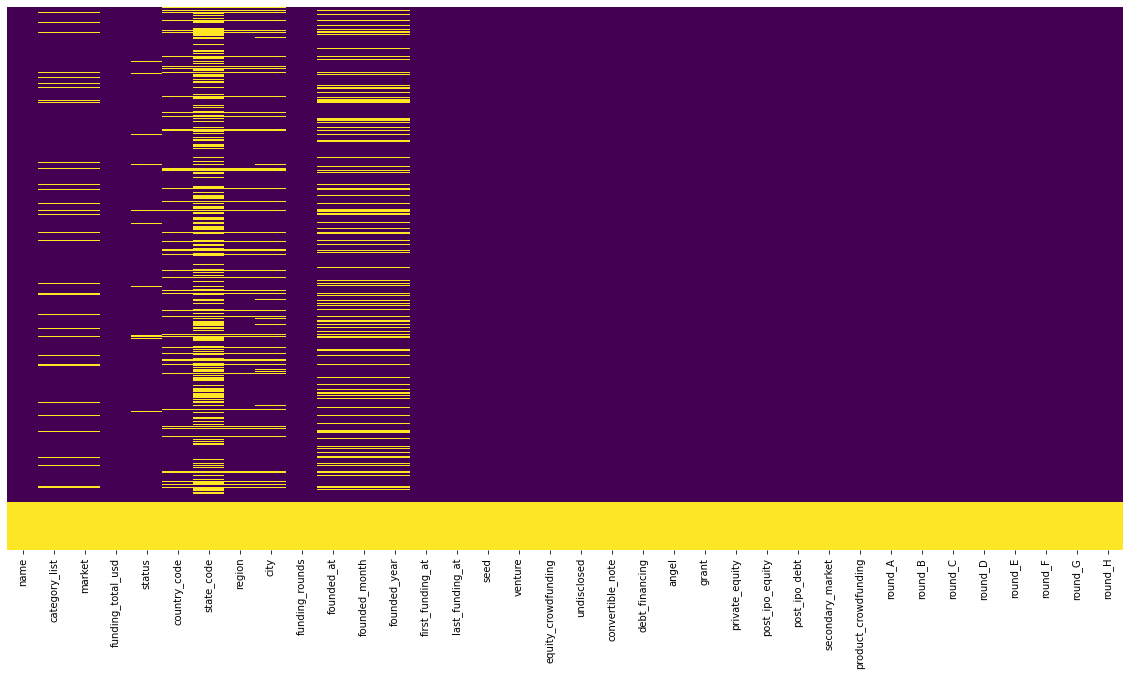

In [28]:
#check and visualize null values
fig = plt.subplots(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [150]:
del df['founded_at']
del df['founded_month']
del df['founded_year']

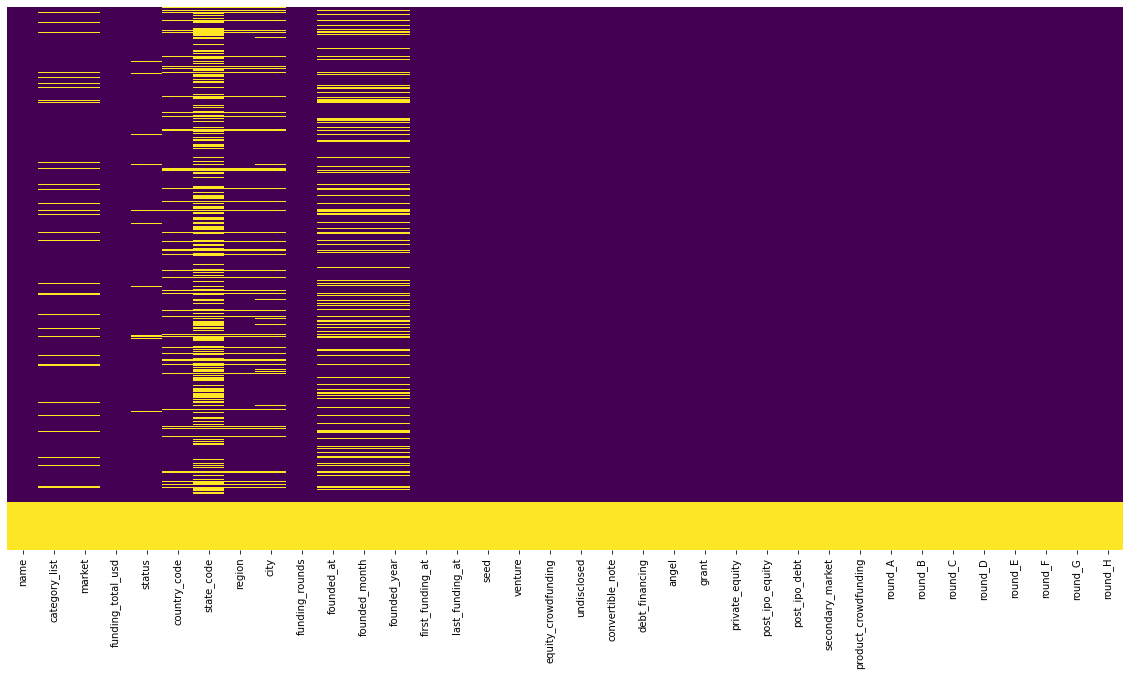

In [29]:
#check and visualize null values
fig = plt.subplots(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

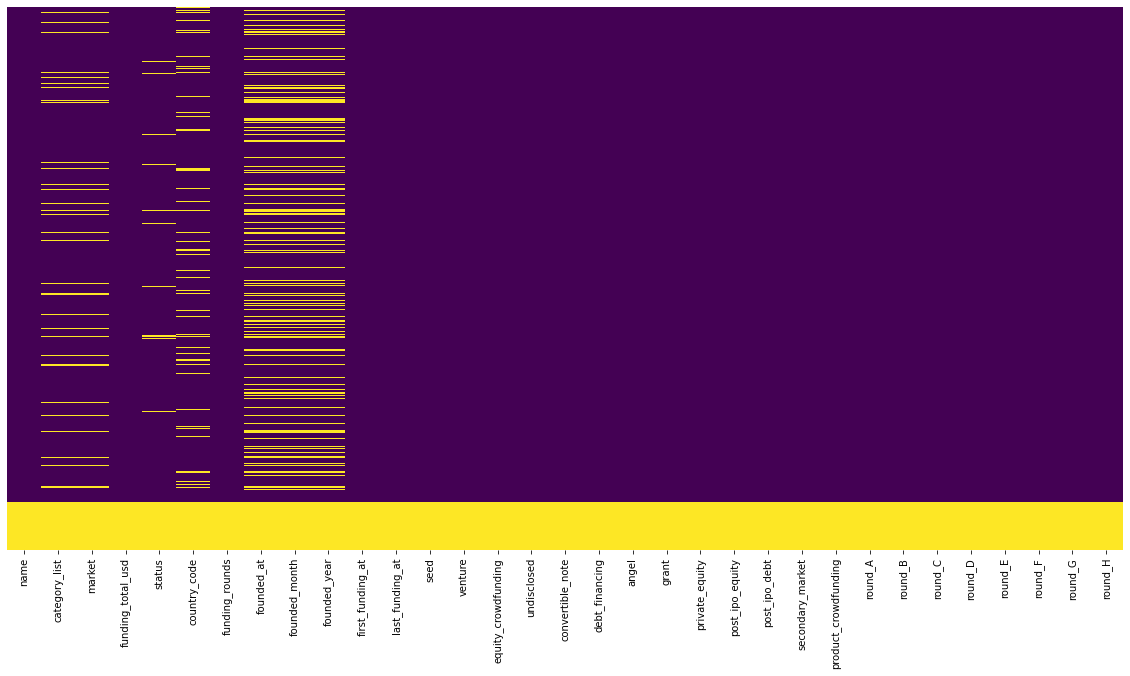

In [32]:
#check and visualize null values
fig = plt.subplots(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [33]:
df.isnull().sum()

name                     4857
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
funding_rounds           4856
founded_at              15741
founded_month           15812
founded_year            15812
first_funding_at         4866
last_funding_at          4862
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E                  4856
round_F                  4856
round_G                  4856
round_H                  4856
dtype: int

From the above we can observe the count 4856 which is null value count of many columns. So we can infer that 4856 rows have NULL values

In [34]:
#drop rows where all values are NaN
df.dropna(how='all', inplace=True)

In [35]:
df['market'].value_counts()

Software               4620
Biotechnology          3688
Mobile                 1983
E-Commerce             1805
Curated Web            1655
                       ... 
Contact Centers           1
Swimming                  1
Retirement                1
Musical Instruments       1
Rural Energy              1
Name: market, Length: 753, dtype: int64

In [36]:
#lets check percentange of missing value
missing_value_train=pd.DataFrame(data=df.isnull().sum()/len(df)*100,index=df.columns,columns=['missing%'])
missing_value_train.sort_values(by='missing%',ascending=False, inplace=True)
missing_value_train[missing_value_train['missing%'] >0]

missing%
founded_year      22.161091
founded_month     22.161091
founded_at        22.017476
country_code      10.665885
market             8.026215
category_list      8.012056
status             2.657875
first_funding_at   0.020227
last_funding_at    0.012136
name               0.002023

In [37]:
df.dropna(inplace=True)

In [38]:
#lets check percentange of missing value
missing_value_train=pd.DataFrame(data=df.isnull().sum()/len(df)*100,index=df.columns,columns=['missing%'])
missing_value_train.sort_values(by='missing%',ascending=False, inplace=True)
missing_value_train[missing_value_train['missing%'] >0]

Empty DataFrame
Columns: [missing%]
Index: []

### 2.0 Visual EDA

***Count of industries that had VC funding (Top 20 sectors)***

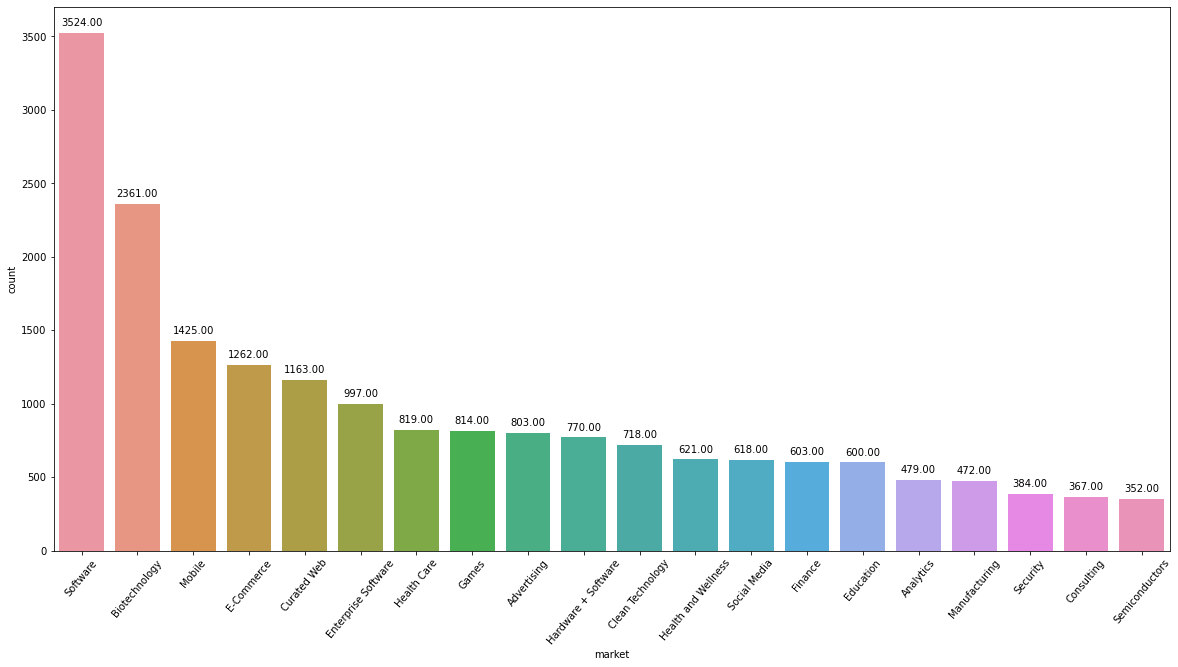

In [39]:
fig = plt.subplots(figsize=(20,10))
ax = sns.countplot(df['market'],order=df['market'].value_counts()[:20].index)
plt.xticks(rotation = 50)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

***Count of most funded sectors***

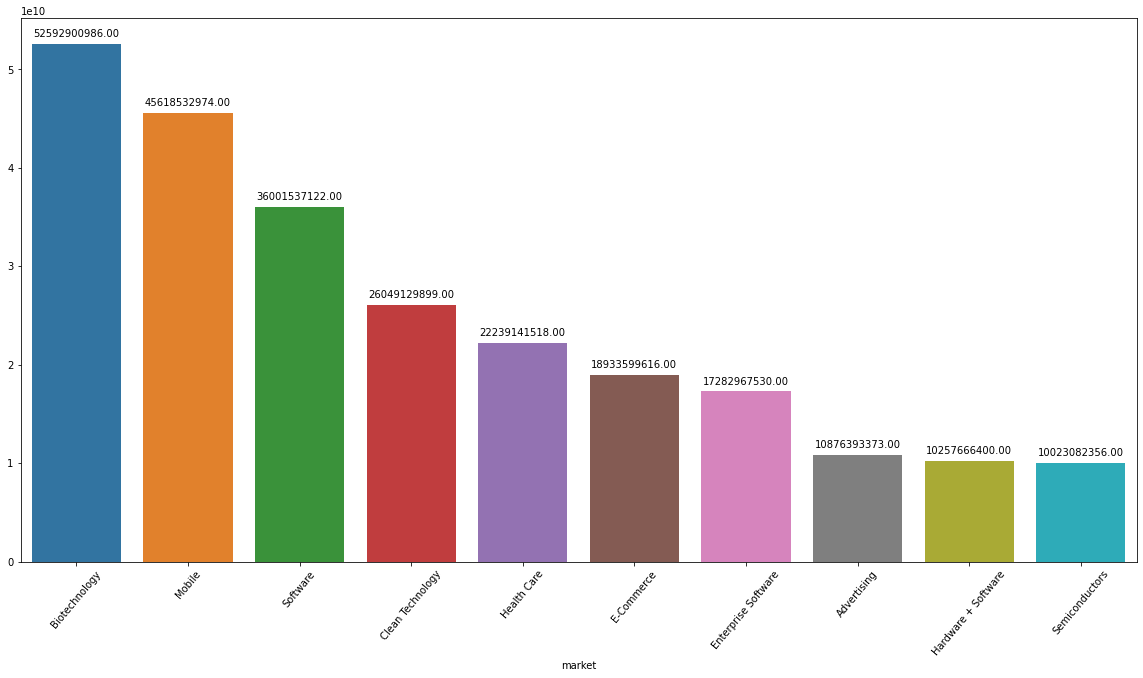

In [40]:
fig = plt.subplots(figsize=(20,10))
market_fund = df.groupby('market').sum()['funding_total_usd'].sort_values(ascending=False)[:10]
ax=sns.barplot(data = df,x = market_fund.index, y= market_fund.values)
plt.xticks(rotation = 50)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

Biotech has the most funding in this dataset

***Count of most country with most funded startups***

The answer will be unsurprising

In [ ]:
fig = plt.subplots(figsize=(20,10))
ax = sns.countplot(df['country_code'],order=df['country_code'].value_counts()[:15].index)
plt.xticks(rotation = 50)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

***Lets see which US based states most of these VC funded companies come from***

Unsurprising that it is CA, as most US based venture startups are from Silicon Valley or San Francisco

***Count of company status***

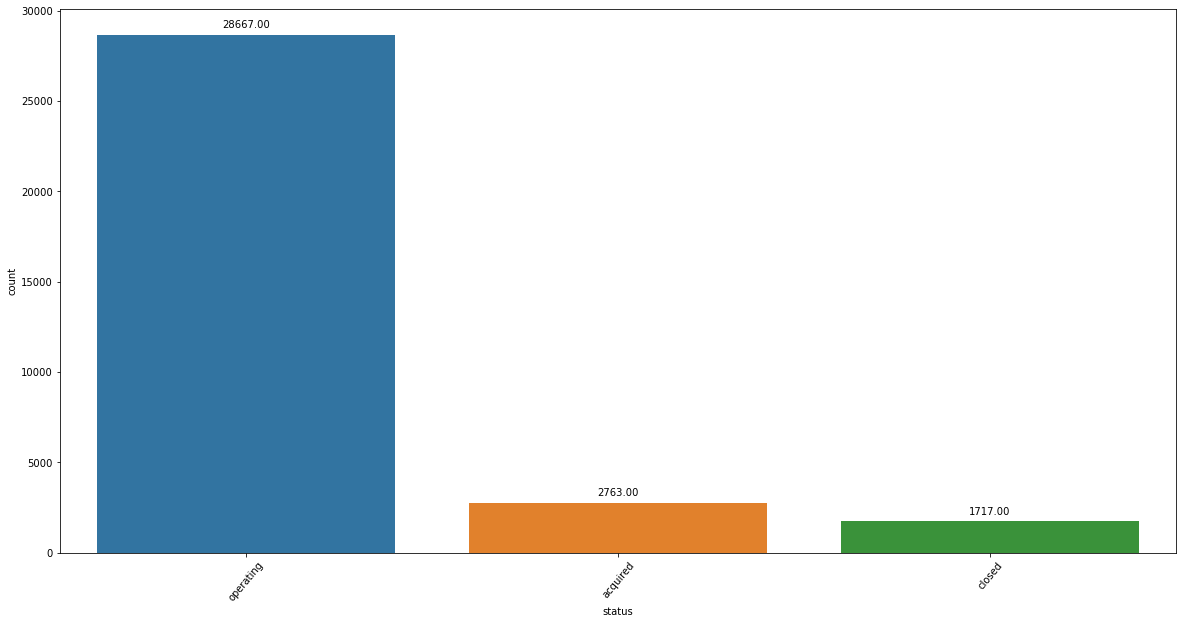

In [45]:
fig = plt.subplots(figsize=(20,10))
ax = sns.countplot(df['status'],order=df['status'].value_counts()[:15].index)
plt.xticks(rotation = 50)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

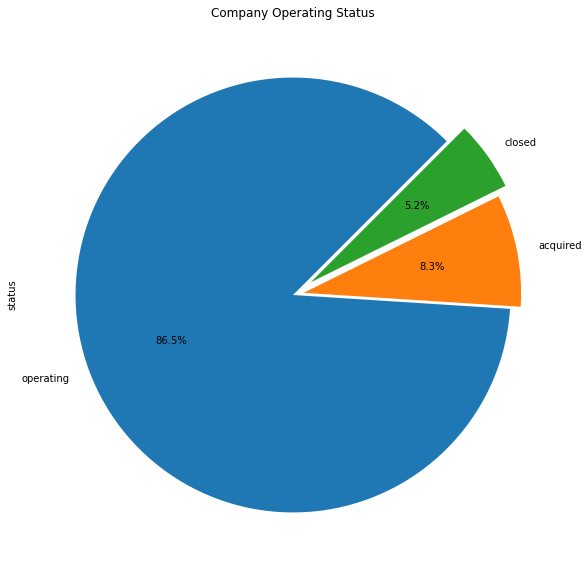

In [46]:
plt.figure(figsize = (10,10))
df.status.value_counts().plot(kind='pie', explode=(0, 0.05, 0.1),autopct='%1.1f%%',startangle=45)
plt.title('Company Operating Status')
plt.show()

We will further analyze this when we want to introduce supervised learning to understand how to pick companies that do not fail, as the dataset is imbalanced, it might be easier to understand a company that fails in this case, as a large proportion here are still operating

***Lets find the most funded company in the dataset***

In [47]:
print(df[df.funding_total_usd == df.funding_total_usd.max()])

                         name category_list  market  funding_total_usd  \
45815  Verizon Communications      |Mobile|  Mobile       3.007950e+10   

          status country_code  funding_rounds founded_at founded_month  \
45815  operating          USA             5.0 1983-10-07    1983-10-01   

      founded_year  ... secondary_market product_crowdfunding  round_A  \
45815   1983-01-01  ...              0.0                  0.0      0.0   

       round_B  round_C  round_D  round_E  round_F  round_G  round_H  
45815      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[1 rows x 33 columns]


***Heatmap of correlations***

<AxesSubplot:>

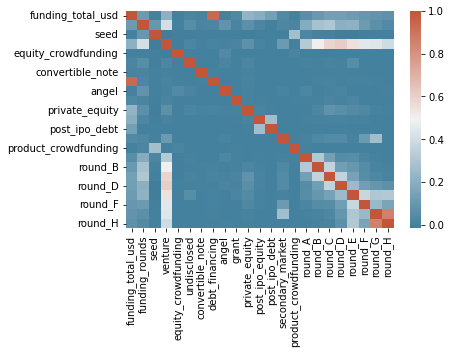

In [48]:
# Compute the correlation matrix
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap)

There is very little correlation within the features

***Pairplot of all feature columns to analyze shape of dataset***

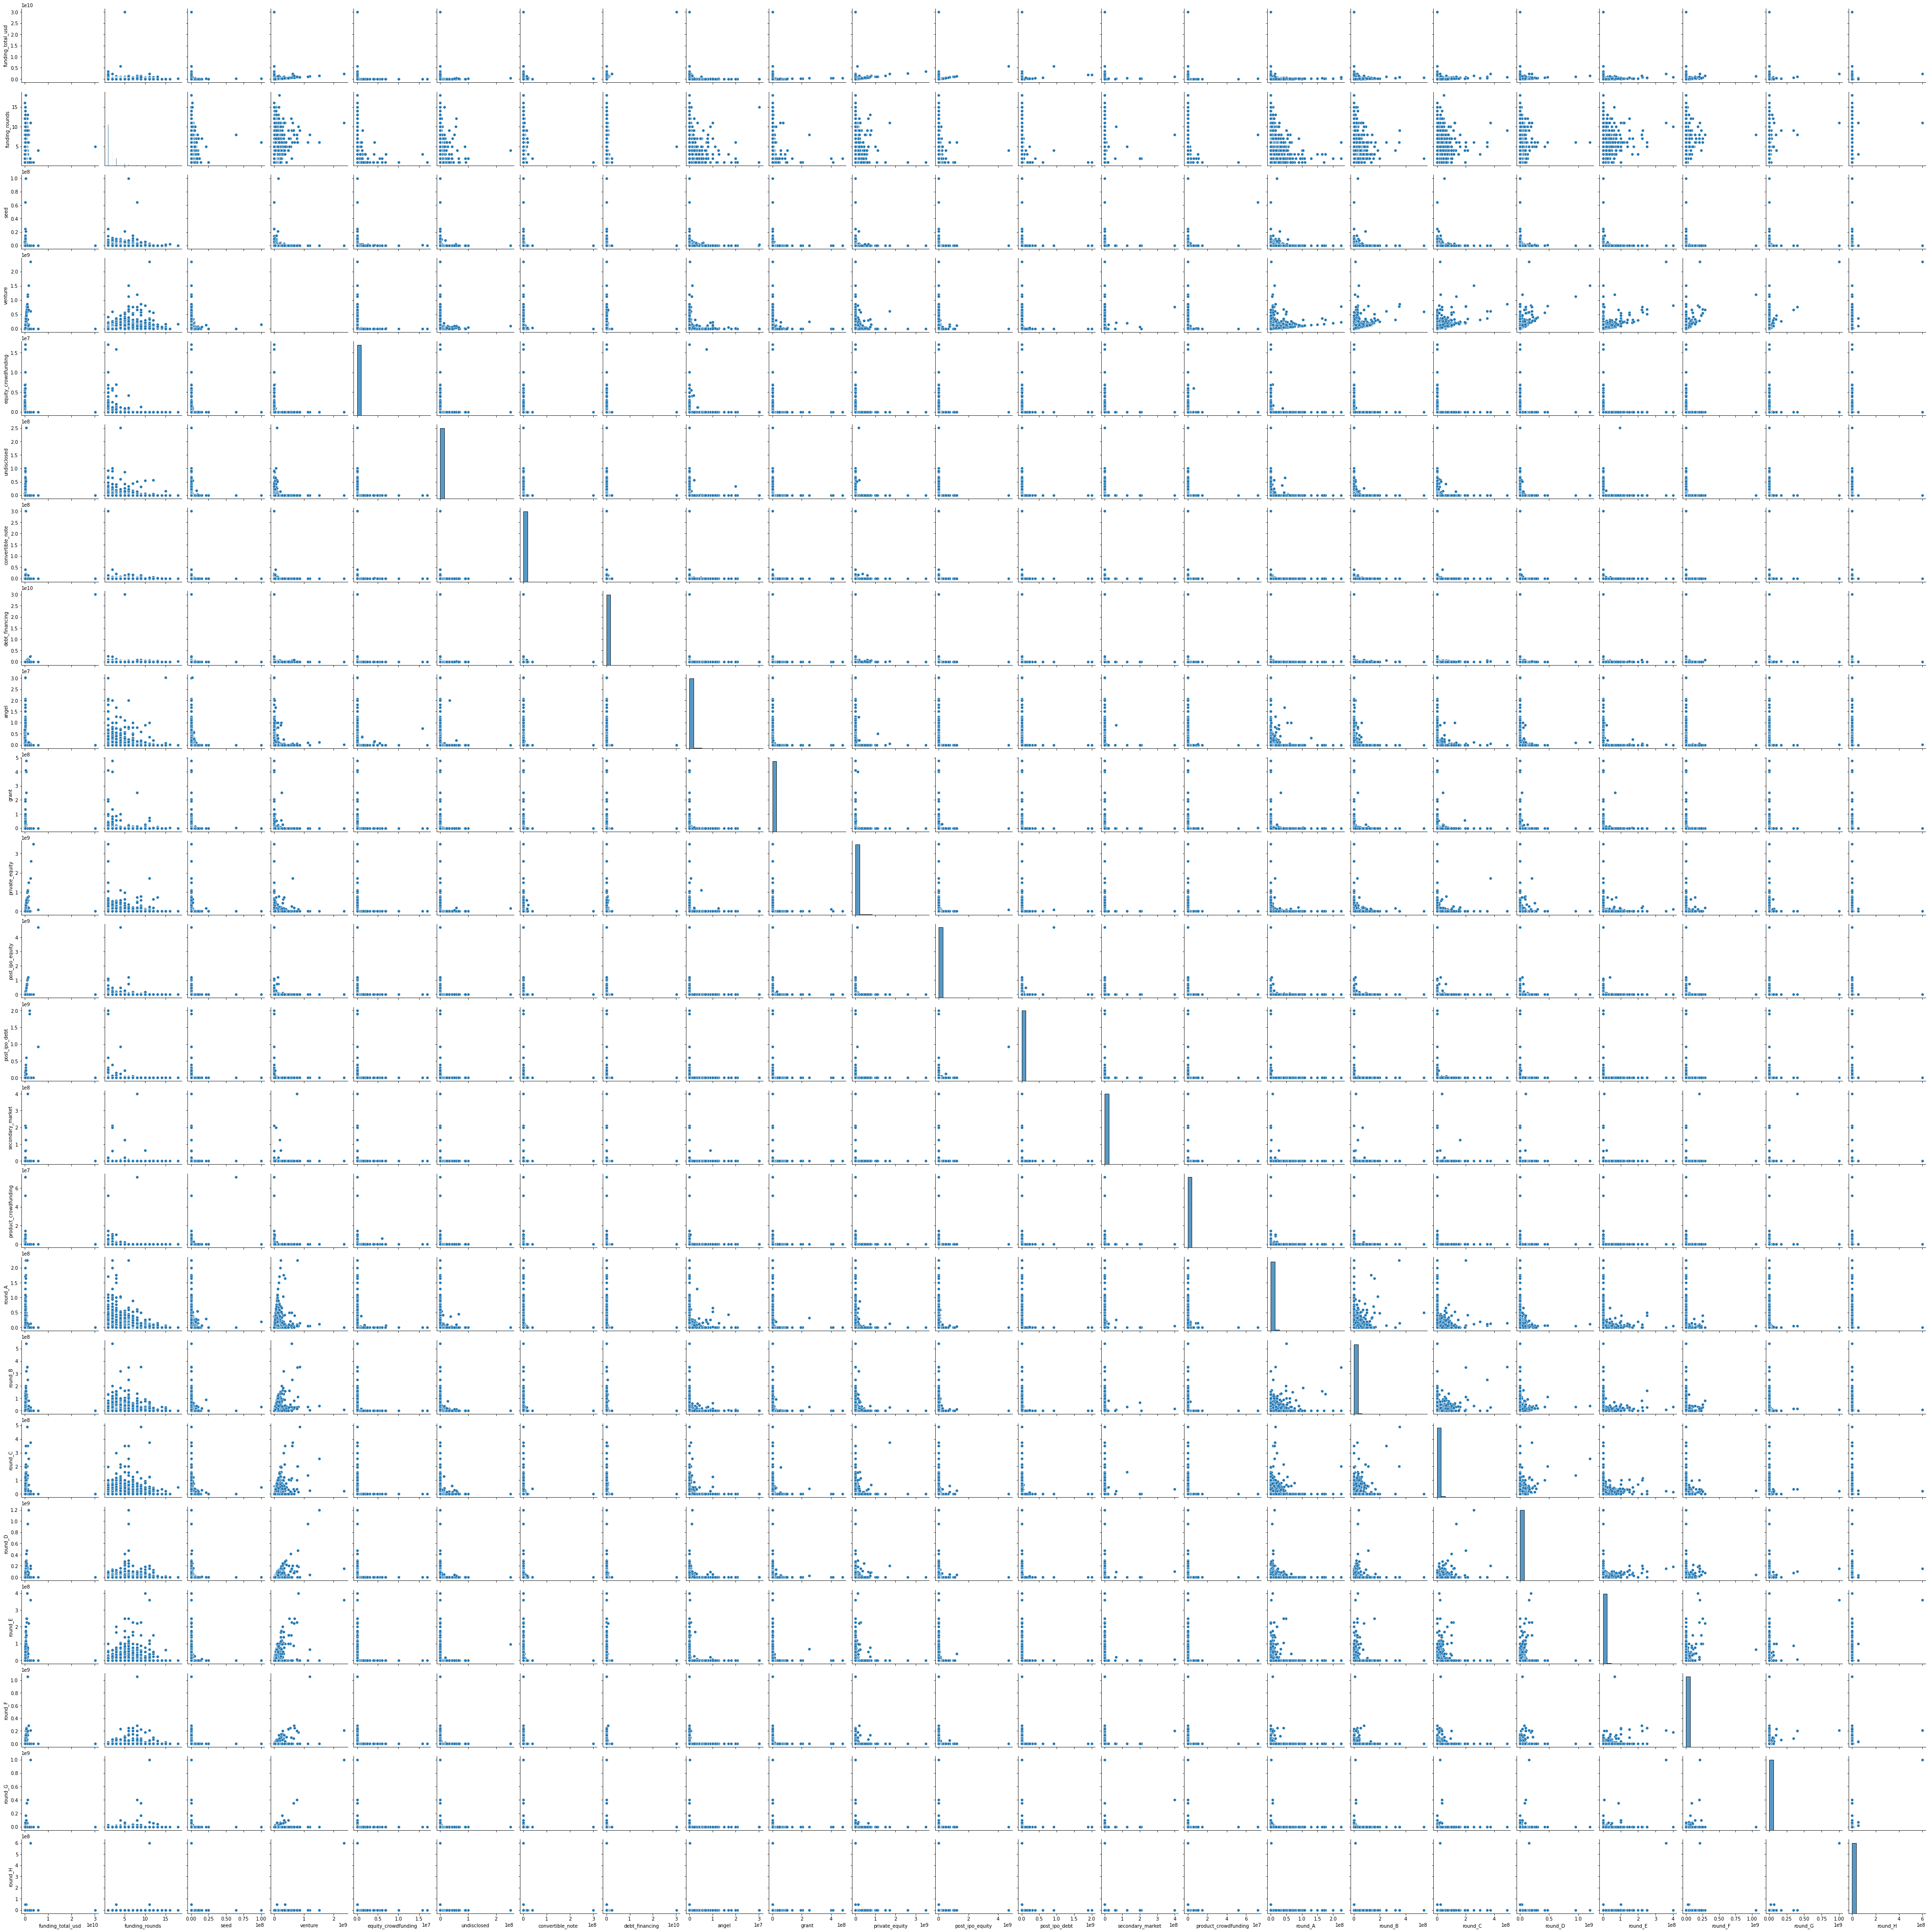

In [49]:
sns.pairplot(df)

### Feature Engineering

In [51]:
df.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [52]:
df["total_disclosed_venture_funding"] = df.seed + df.venture + df.angel + df.round_A + df.round_B +df.round_C +df.round_D+df.round_E+df.round_F+df.round_G+df.round_H

In [53]:
#create a copy df for our averages table
df_averages = df.copy()

In [54]:
df_averages["average_fundraise"] = (
    df.groupby("market")  # for each industry
    ["total_disclosed_venture_funding"]  # select disclosed PE funding estimate
    .transform("mean")         # and compute its mean
)

In [55]:
df_averages[["market", "total_disclosed_venture_funding", "average_fundraise"]]

market  total_disclosed_venture_funding  average_fundraise
0                     News                        1750000.0       8.061045e+06
2               Publishing                          40000.0       1.585450e+07
3              Electronics                        1500000.0       1.285960e+07
4                  Tourism                              0.0       1.149359e+06
8                 Software                              0.0       1.178103e+07
...                    ...                              ...                ...
49430        Biotechnology                       17990457.0       2.570033e+07
49432        Biotechnology                        5373200.0       2.570033e+07
49433            Education                         320000.0       6.601812e+06
49435      Web Development                          71525.0       1.471471e+07
49437  Enterprise Software                       54000000.0       2.191672e+07

[33147 rows x 3 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33147 entries, 0 to 49437
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   name                             33147 non-null  object        
 1   category_list                    33147 non-null  object        
 2   market                           33147 non-null  object        
 3   funding_total_usd                33147 non-null  float64       
 4   status                           33147 non-null  object        
 5   country_code                     33147 non-null  object        
 6   funding_rounds                   33147 non-null  float64       
 7   founded_at                       33147 non-null  datetime64[ns]
 8   founded_month                    33147 non-null  datetime64[ns]
 9   founded_year                     33147 non-null  datetime64[ns]
 10  first_funding_at                 33147 non-null  datetime6

In [57]:
#save a csv copy here before we label encode so that we can analyze the data in Tableau
df.to_csv('crunchbase_2010_to_2014_notProcessed_corrected.csv')

### 3.0 Pre-processing

***Label encoding categorical features with Factorize***

In [67]:
df.set_index('name', inplace=True)

In [59]:
#lowercase all str col. when we factorize this will keep the keys consistent, incase some are not in the same format
for col in df:
    if df[col].dtype == 'object':
        print(col)
        df[col] = df[col].astype(str).str.lower() 

category_list
market
status
country_code


In [60]:
#here we factorize object columns and then put the keys and values into a dict so we can later refer
df_dict = {}
for col in df:
    if df[col].dtype == 'object':
        key, value = pd.factorize(df[col]) 
        temp = dict(zip(list(set(key)),list(value)))
        df_dict[col] = temp
        df[col] = key

In [61]:
df_dict

{'category_list': {0: '|entertainment|politics|social media|news|',
  1: '|publishing|education|',
  2: '|electronics|guides|coffee|restaurants|music|iphone|apps|mobile|ios|e-commerce|',
  3: '|tourism|entertainment|games|',
  4: '|software|',
  5: '|e-commerce|',
  6: '|health and wellness|',
  7: '|real estate|',
  8: '|education|',
  9: '|search|',
  10: '|curated web|',
  11: '|local businesses|restaurants|',
  12: '|media|games|',
  13: '|health care information technology|',
  14: '|analytics|',
  15: '|fashion|',
  16: '|mobility|enterprise software|software|',
  17: '|biotechnology|',
  18: '|social travel|',
  19: '|sports|',
  20: '|audio|music|mobile|',
  21: '|politics|technology|medical devices|pharmaceuticals|personalization|software|',
  22: '|saas|e-commerce|',
  23: '|saas|software|retail|',
  24: '|manufacturing|',
  25: '|ipad|games|augmented reality|computer vision|mobile|',
  26: '|interest graph|advertising|',
  27: '|entertainment|sports|real time|social media|vi

df_dict was saved into a .txt called keys_values_dict

Sources to consider:
- https://bpostance.github.io/posts/clustering-mixed-data/ -TUTORIAL
- https://csitcp.com/paper/7/72csit07.pdf
- https://web.wpi.edu/Pubs/ETD/Available/etd-042605-092010/unrestricted/ZhiweiRen.pdf

In [62]:
df.columns

Index(['category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'total_disclosed_venture_funding'],
      dtype='object')

In [63]:
del df['funding_total_usd']

In [64]:
#took out datetime cols
df = df[['market', 'status', 'country_code', 'funding_rounds', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'total_disclosed_venture_funding']]

### PCA

PCA reduces dimensionality. It does not change the number of observations you have. Nor does it change the order of the data. The n-th observation in your original dataset will still be the n-th observation post-PCA.

Choosing the number of components in PCA and choosing the number of clusters in K-Means are independent of each other. Both K-Means and PCA seek to "simplify/summarize" the data, but their mechanisms are deeply different. PCA looks to find a low-dimensional representation of the observation that explains a good fraction of the variance. K-Means looks to find homogeneous subgroups among the observations.

For PCA, the optimal number of components is determined visually through the scree plot or mathematically using Kaiser's criterion (drop all components with eigenvalue <1). From my experience the two don't always give the same results, but the difference is negligible.


In [65]:
df.to_pickle('crunchbase_companies_processed_with_fundrounds.pkl')

In [152]:
df = pd.read_pickle('crunchbase_companies_processed_with_fundrounds.pkl')

In [153]:
df.columns

Index(['market', 'status', 'country_code', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'total_disclosed_venture_funding'],
      dtype='object')

In [154]:
df = df[['market', 'status', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H','total_disclosed_venture_funding']]

In [155]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

In [156]:
# Create a PCA instance: pca
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(X_std)

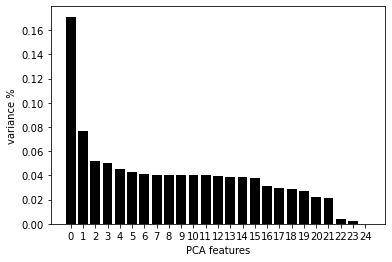

In [157]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')

plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Fig shows that 2 is the optimal number of features that explains the dataset

### Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

Text(0, 0.5, 'Inertia')

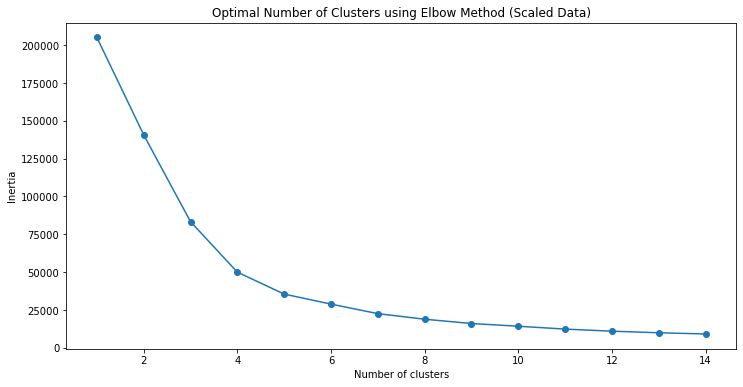

In [158]:
sse = []
k_list = range(1, 15)

for k in k_list:
    km = KMeans(n_clusters=k)
    # Fit model to samples
    km.fit(PCA_components.iloc[:,:2])
    #km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Fig shows that the first that 5 is the optimal number of clusters that explains the dataset. after that variance drops out

### 3.0 Clustering

We have over 49k entries in this dataset, so need to make some considerations for clustering

We will use unsupervised learning for clustering.

Clustering in this context means we will group highly correlated stocks first and treat them as a single stock. This will allow the VC investor to ensure their portfolio is either more diversified to allow for better risk adjusted returns, or allow the investor to explore and find more exposure into similar areas, or find stock of companies that they didnt realize were similar.


#### What is Clustering?

Clustering can be considered the most important unsupervised learning problem; thus, like any other such problem, it involves finding structure in a collection of unlabeled data. A loose definition of clustering might be, "The process of organizing objects into groups whose members are similar in some way." Thus, a cluster is a collection of objects that are "similar" to each other and "dissimilar" to objects that belong to other clusters.

***
Business question : How can we find patterns to have a diversified VCPE stock portfolio to ensure the portfolio using an unbiased data driven approach. There are 54k instances and this would take alot of time. Man hours spent by the analyst could be better put elsewhere ie negotiating to find the deals.
***

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters

In [159]:
df_scale2 = PCA_components.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)

print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))

labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.629046231628998


### K means clustering without PCA components

In [160]:
X = df.loc[:, ['market', 'total_disclosed_venture_funding']]
X.head()

market  total_disclosed_venture_funding
name                                                       
#waywire                 0                        1750000.0
'Rock' Your Paper        1                          40000.0
(In)Touch Network        2                        1500000.0
-R- Ranch and Mine       3                              0.0
004 Technologies         4                              0.0

In [161]:
# Create cluster feature
kmeans = KMeans(n_clusters=4)
df["Cluster_NO_PCA"] = kmeans.fit_predict(X)

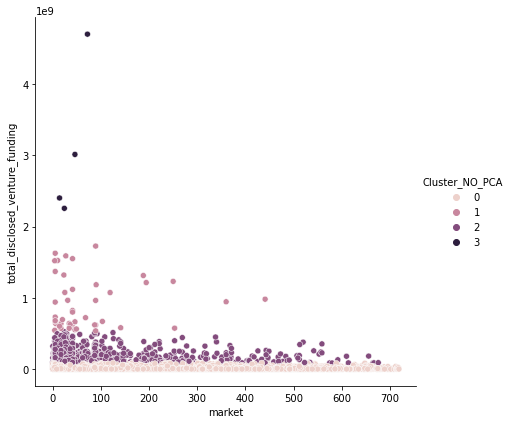

In [162]:
sns.relplot(
    x="market", y="total_disclosed_venture_funding", hue="Cluster_NO_PCA", data=df, height=6,
);

In [163]:
df.market.value_counts()

4      3524
17     2361
20     1425
5      1262
10     1163
       ... 
595       1
594       1
86        1
582       1
719       1
Name: market, Length: 720, dtype: int64

### K means clustering with PCA components

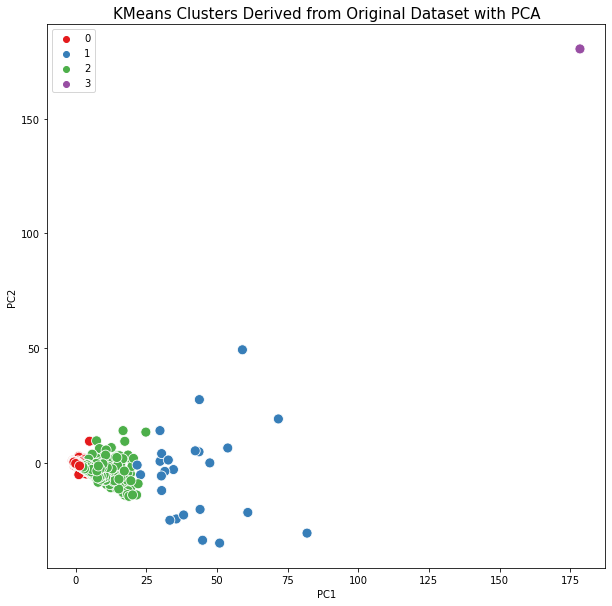

In [164]:
pca2 = PCA(n_components=2).fit(X_std)
pca2d = pca2.transform(X_std)
plt.figure(figsize = (10,10))

sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100,).set_title('KMeans Clusters Derived from Original Dataset with PCA', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [165]:
pca2d_df = pd.DataFrame(data = pca2d
             , columns = ['principal component 1', 'principal component 2'])

In [166]:
pca2d_df['principal component 1']

0       -0.471766
1       -0.586913
2       -0.573227
3       -0.430918
4       -0.587477
           ...   
33142    0.304173
33143   -0.435538
33144   -0.584713
33145    0.042110
33146    1.409532
Name: principal component 1, Length: 33147, dtype: float64

In [167]:
df.reset_index(inplace=True)

In [168]:
df['pca1'] = pca2d_df['principal component 1']

In [169]:
df['pca2'] =  pca2d_df['principal component 2']

In [170]:
kmeans_model = KMeans(n_clusters = 4, random_state = 1).fit(PCA_components.iloc[:,:2])

In [171]:
df["ClusterWITH_PCA"] = kmeans_model.fit_predict(X)

PCA visualizations tend to aggregate clusters around a central point which makes interpretation difficult but we can see clusters 2 and 0 to have some distinct structure compared to clusters 3, 1 and 4. 


However, when we plot the clusters into a 3D space we can almost see all 5 clusters

Conclusion:
- an unbiased approach to portfolio diversification in private equity investments is quite hard to interpret with this dataset
- a supervised learning approach identifying for company success might be a more useful tool for PE investors

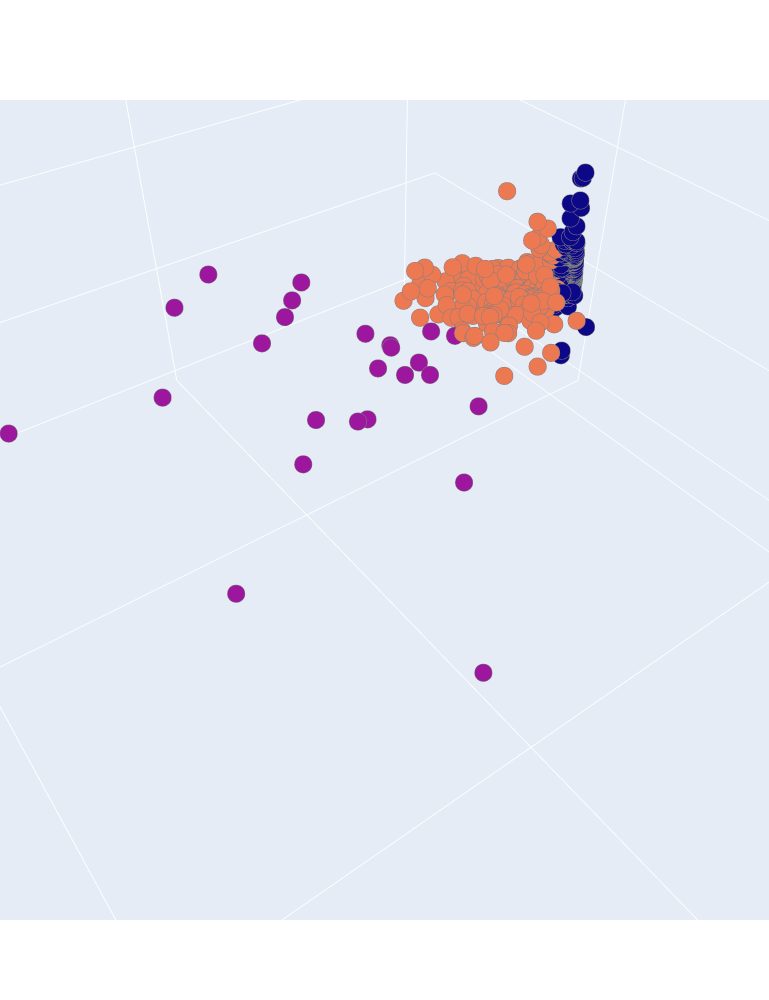

In [112]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))

labels_scale = kmeans_scale.labels_
labels = labels_scale

trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [172]:
df.columns

Index(['name', 'market', 'status', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'total_disclosed_venture_funding', 'Cluster_NO_PCA', 'pca1',
       'pca2', 'ClusterWITH_PCA'],
      dtype='object')

In [174]:
df.set_index('name')

market  status  funding_rounds       seed     venture  \
name                                                                           
#waywire                    0       0             1.0  1750000.0         0.0   
'Rock' Your Paper           1       1             1.0    40000.0         0.0   
(In)Touch Network           2       1             1.0  1500000.0         0.0   
-R- Ranch and Mine          3       1             2.0        0.0         0.0   
004 Technologies            4       1             1.0        0.0         0.0   
...                       ...     ...             ...        ...         ...   
Zyraz Technology           17       2             4.0        0.0   7991547.0   
Zytoprotec                 17       1             1.0        0.0   2686600.0   
Zzish                       8       1             1.0   320000.0         0.0   
Zzzzapp Wireless ltd.      56       1             5.0    71525.0         0.0   
[x+1]                      36       1             4.0        0.0  28000000.0   

                       equity_crowdfunding  undisclosed  convertible_note  \
name                                                                        
#waywire                               0.0          0.0               0.0   
'Rock' Your Paper                      0.0          0.0               0.0   
(In)Touch Network                      0.0          0.0               0.0   
-R- Ranch and Mine                 60000.0          0.0               0.0   
004 Technologies                       0.0          0.0               0.0   
...                                    ...          ...               ...   
Zyraz Technology                       0.0          0.0               0.0   
Zytoprotec                             0.0          0.0               0.0   
Zzish                                  0.0          0.0               0.0   
Zzzzapp Wireless ltd.                  0.0          0.0           25873.0   
[x+1]                                  0.0          0.0               0.0   

                       debt_financing      angel  ...  round_D  round_E  \
name                                              ...                     
#waywire                          0.0        0.0  ...      0.0      0.0   
'Rock' Your Paper                 0.0        0.0  ...      0.0      0.0   
(In)Touch Network                 0.0        0.0  ...      0.0      0.0   
-R- Ranch and Mine                0.0        0.0  ...      0.0      0.0   
004 Technologies                  0.0        0.0  ...      0.0      0.0   
...                               ...        ...  ...      ...      ...   
Zyraz Technology                  0.0  2007363.0  ...      0.0      0.0   
Zytoprotec                        0.0        0.0  ...      0.0      0.0   
Zzish                             0.0        0.0  ...      0.0      0.0   
Zzzzapp Wireless ltd.             0.0        0.0  ...      0.0      0.0   
[x+1]                      17000000.0        0.0  ...      0.0      0.0   

                       round_F  round_G  round_H  \
name                                               
#waywire                   0.0      0.0      0.0   
'Rock' Your Paper          0.0      0.0      0.0   
(In)Touch Network          0.0      0.0      0.0   
-R- Ranch and Mine         0.0      0.0      0.0   
004 Technologies           0.0      0.0      0.0   
...                        ...      ...      ...   
Zyraz Technology           0.0      0.0      0.0   
Zytoprotec                 0.0      0.0      0.0   
Zzish                      0.0      0.0      0.0   
Zzzzapp Wireless ltd.      0.0      0.0      0.0   
[x+1]                      0.0      0.0      0.0   

                       total_disclosed_venture_funding  Cluster_NO_PCA  \
name                                                                     
#waywire                                     1750000.0               0   
'Rock' Your Paper                              40000.0               0   
(In)Touch Network              

In [175]:
#output final df to csv incase Tableau needs
df.to_csv('FINAL_CRUNCHBASE_2010to2014.csv')

In [176]:
df2 = pd.read_csv('FINAL_CRUNCHBASE_2010to2014.csv')

In [177]:
df2

Unnamed: 0                   name  market  status  funding_rounds  \
0               0               #waywire       0       0             1.0   
1               1      'Rock' Your Paper       1       1             1.0   
2               2      (In)Touch Network       2       1             1.0   
3               3     -R- Ranch and Mine       3       1             2.0   
4               4       004 Technologies       4       1             1.0   
...           ...                    ...     ...     ...             ...   
33142       33142       Zyraz Technology      17       2             4.0   
33143       33143             Zytoprotec      17       1             1.0   
33144       33144                  Zzish       8       1             1.0   
33145       33145  Zzzzapp Wireless ltd.      56       1             5.0   
33146       33146                  [x+1]      36       1             4.0   

            seed     venture  equity_crowdfunding  undisclosed  \
0      1750000.0         0.0                  0.0          0.0   
1        40000.0         0.0                  0.0          0.0   
2      1500000.0         0.0                  0.0          0.0   
3            0.0         0.0              60000.0          0.0   
4            0.0         0.0                  0.0          0.0   
...          ...         ...                  ...          ...   
33142        0.0   7991547.0                  0.0          0.0   
33143        0.0   2686600.0                  0.0          0.0   
33144   320000.0         0.0                  0.0          0.0   
33145    71525.0         0.0                  0.0          0.0   
33146        0.0  28000000.0                  0.0          0.0   

       convertible_note  ...  round_D  round_E  round_F  round_G  round_H  \
0                   0.0  ...      0.0      0.0      0.0      0.0      0.0   
1                   0.0  ...      0.0      0.0      0.0      0.0      0.0   
2                   0.0  ...      0.0      0.0      0.0      0.0      0.0   
3                   0.0  ...      0.0      0.0      0.0      0.0      0.0   
4                   0.0  ...      0.0      0.0      0.0      0.0      0.0   
...                 ...  ...      ...      ...      ...      ...      ...   
33142               0.0  ...      0.0      0.0      0.0      0.0      0.0   
33143               0.0  ...      0.0      0.0      0.0      0.0      0.0   
33144               0.0  ...      0.0      0.0      0.0      0.0      0.0   
33145           25873.0  ...      0.0      0.0      0.0      0.0      0.0   
33146               0.0  ...      0.0      0.0      0.0      0.0      0.0   

       total_disclosed_venture_funding  Cluster_NO_PCA      pca1      pca2  \
0                            1750000.0               0 -0.471766  0.061108   
1                              40000.0               0 -0.586913  0.363659   
2                            1500000.0               0 -0.573227  0.308429   
3                                  0.0               0 -0.430918  0.204860   
4                                  0.0               0 -0.587477  0.365268   
...                                ...             ...       ...       ...   
33142                       17990457.0               0  0.304173 -0.385216   
33143                        5373200.0               0 -0.435538  0.236589   
33144                         320000.0               0 -0.584713  0.353283   
33145                          71525.0               0  0.042110 -0.286430   
33146                       54000000.0               0  1.409532 -1.317049   

       ClusterWITH_PCA  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
33142                1  
33143                1  
33144                1  
33145                1  
33146                1  

[33147 rows x 31 columns]

In [5]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/43 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]